#**1.Import Libraries:**

In [ ]:
# STEP 1 ───────────────────────────────────────────────────────
import pandas as pd
from sklearn.model_selection import train_test_split # For spliting the data
from sklearn.preprocessing import StandardScaler # For feature‑scaling
from sklearn.linear_model import LogisticRegression # LR model we will use
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # Accuracy, classification report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**2.Load the data:**

In [ ]:
# import kagglehub
# path = kagglehub.dataset_download("arezalo/diabetes")
# df = pd.read_csv(f"{path}/diabetes.csv")
df =  pd.read_csv("diabetes.csv")
df["outcome"] = df["outcome"].map({1: "Diabetic", 0: "Non‑diabetic"})

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non‑diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non‑diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic
5,5,116,74,0,0,25.6,0.201,30,Non‑diabetic
6,3,78,50,32,88,31.0,0.248,26,Diabetic
7,10,115,0,0,0,35.3,0.134,29,Non‑diabetic
8,2,197,70,45,543,30.5,0.158,53,Diabetic
9,8,125,96,0,0,0.0,0.232,54,Diabetic


# **3.Clean the data:**

In [ ]:
# 1) Drop duplicate rows
df = df.drop_duplicates()

# 2) Drop rows that contain any NaN
df = df.dropna()

# 3) Drop rows that contain a zero in the main features
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df = df[(df[cols] != 0).all(axis=1)]

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
3,1,89,66,23,94,28.1,0.167,21,Non‑diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic
6,3,78,50,32,88,31.0,0.248,26,Diabetic
8,2,197,70,45,543,30.5,0.158,53,Diabetic
13,1,189,60,23,846,30.1,0.398,59,Diabetic
14,5,166,72,19,175,25.8,0.587,51,Diabetic
16,0,118,84,47,230,45.8,0.551,31,Diabetic
18,1,103,30,38,83,43.3,0.183,33,Non‑diabetic
19,1,115,70,30,96,34.6,0.529,32,Diabetic
20,3,126,88,41,235,39.3,0.704,27,Non‑diabetic


In [ ]:
df.shape

(392, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   outcome                   392 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 30.6+ KB


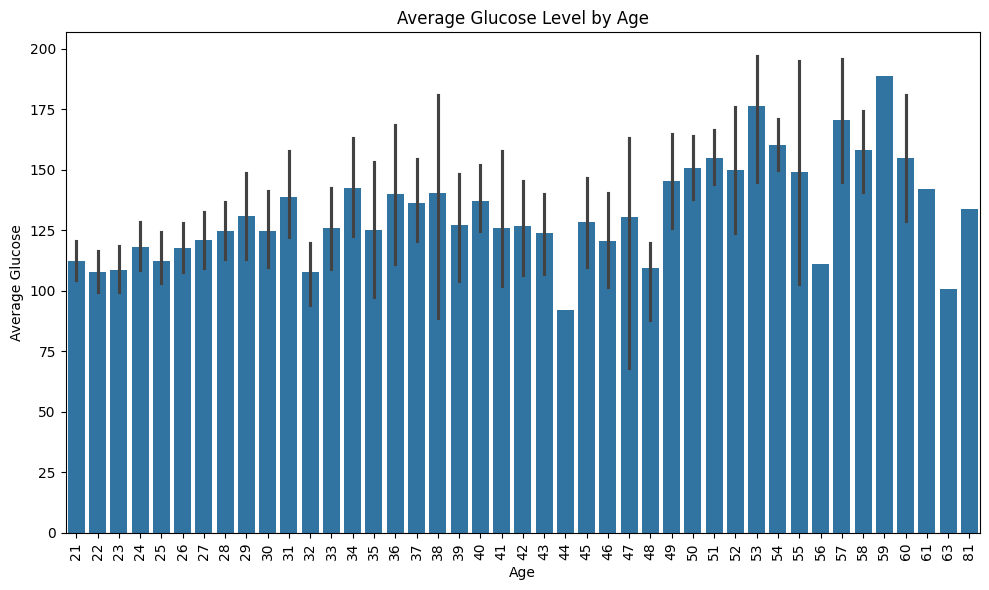

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Glucose', data=df)
plt.title('Average Glucose Level by Age')
plt.xlabel('Age')
plt.ylabel('Average Glucose')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **4.Split features & labels**

In [ ]:
# STEP 4 ───────────────────────────────────────────────────────
df["outcome"] = df["outcome"].map({"Diabetic": 1, "Non‑diabetic": 0}) # if Diabetic make it 1, if not make it 0

In [ ]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1
18,1,103,30,38,83,43.3,0.183,33,0
19,1,115,70,30,96,34.6,0.529,32,1
20,3,126,88,41,235,39.3,0.704,27,0


In [ ]:
# STEP 4 ───────────────────────────────────────────────────────
X = df.drop('outcome', axis=1)   # all columns except the target
y = df['outcome']                # the target column

# **5.Train‑test split**

| Split                            | What you look at                                                                                      | What it really is in machine-learning words                                              |
| -------------------------------- | ----------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------- |
| **Practice pages** (80 problems) | You see **the questions** *and* **peek at the answer key** so you can learn how to solve them.        | **X\_train** = the questions (clues) <br> **y\_train** = the answer key (correct labels) |
| **Exam pages** (20 problems)     | You only see **the questions**; you **hide the answer key** so you have to solve them yourself.       | **X\_test** = new questions with no answers shown                                        |
| **Grading sheet**                | After finishing the exam pages, you finally look at the hidden answers to see how many you got right. | **y\_test** = the answer key for the exam pages                                          |


In [ ]:
# STEP 5 ───────────────────────────────────────────────────────
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,          # 20% goes to invisible “final exam”
    random_state=42,         # repeatability
    stratify=y               # keep 0/1 ratio the same, numbers of 0's and 1's in same amount
)

# **6. Scale the numbers**

In [ ]:
# STEP 6 ───────────────────────────────────────────────────────
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # learn scale + apply
X_test_scaled  = scaler.transform(X_test)        # apply the exact same scale

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (313, 8)
X_test_scaled shape: (79, 8)


In [ ]:
# How the model can read the DATA:
print(X_train_scaled)
print("-" * 70)
print(X_test_scaled)

[[ 0.20702118  0.80817579  1.141268   ... -0.60276844 -0.99089865
  -0.37871599]
 [-0.09862802  1.82190416  1.22273138 ...  0.03870648  1.9118721
   2.0384558 ]
 [ 1.12396877  0.36889349  1.38565812 ... -0.0925043  -0.77131081
   0.58815273]
 ...
 [-0.09862802 -1.62477232 -0.24360932 ... -0.48613664 -0.67806118
  -0.76546348]
 [-0.70992641 -1.05032624 -1.38409652 ... -1.14219054 -0.85553629
  -0.76546348]
 [-0.70992641  1.41641281  0.89687789 ... -0.0341884  -0.53367466
   1.84508206]]
----------------------------------------------------------------------
[[ 1.12396877e+00  2.19360457e+00 -1.70995001e+00  3.58407935e-01
   2.06590818e+00  1.26180335e-01  9.25230847e-01  2.98092112e-01]
 [-4.04277212e-01 -2.80691564e-03  4.08097658e-01 -1.96032017e-01
   4.10912405e-01  4.17759846e-01 -1.06531192e-01 -4.75402861e-01]
 [-7.09926409e-01  1.17987619e+00  8.22441709e-02 -7.50471969e-01
   1.35079777e-01 -1.08387464e+00 -1.18943012e+00 -6.68776604e-01]
 [ 2.34656556e+00  4.70266327e-01  1.05

# **7. Train the logistic regression model**

In [ ]:
# STEP 7 ───────────────────────────────────────────────────────
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

# **8. Evaluate**

In [ ]:
# STEP 8 ───────────────────────────────────────────────────────
y_pred = model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 83.54%


| **Doctor knows (truth)** ↓ / **Machine says** → | **Diabetes**                                       | **No Diabetes**                                |
| ----------------------------------------------- | -------------------------------------------------- | ---------------------------------------------- |
| **Person *has* Diabetes**                       | **TP – True Positive**<br>(machine is right)       | **FN – False Negative**<br>(machine missed it) |
| **Person *has NO* Diabetes**                    | **FP – False Positive**<br>(machine false-alarmed) | **TN – True Negative**<br>(machine is right)   |


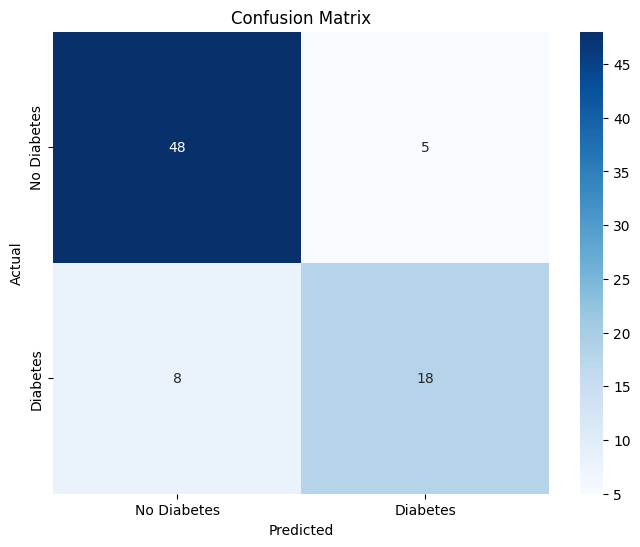

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# TP FP
# FN TN

#                           ( True Positives + True Negatives )
# Accuracy = ------------------------------------------------------------------------
#             ( False Positives + False Negatives + True Positives + True Negatives )
